# Rf 1 0 6_Plotdecoration
Basic functionality: adding boxes with parameters to RooPlots and decorating with arrows, etc...




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 02:41 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Set up model
---------------------

Create observables

In [2]:
x = ROOT.RooRealVar("x", "x", -10, 10)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Create Gaussian

In [3]:
sigma = ROOT.RooRealVar("sigma", "sigma", 1, 0.1, 10)
mean = ROOT.RooRealVar("mean", "mean", -3, -10, 10)
gauss = ROOT.RooGaussian("gauss", "gauss", x, mean, sigma)

Generate a sample of 1000 events with sigma=3

In [4]:
data = gauss.generate(ROOT.RooArgSet(x), 1000)

Fit pdf to data

In [5]:
gauss.fitTo(data)

<ROOT.RooFitResult object at 0x(nil)>

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 mean        -3.00000e+00  2.00000e+00   -1.00000e+01  1.00000e+01
     2 sigma        1.00000e+00  4.50000e-01    1.00000e-01  1.00000e+01
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1000           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGENCE WHEN EDM .LT. 1.00e-03
 FCN=1457.87 FROM MIGRAD    STATUS=INITIATE        8 CALLS           9 TOTAL
                     EDM= unknown      STRATEGY= 1      NO ERROR MATRIX 

Plot p.d.f. and data
-------------------------------------

Overlay projection of gauss on data

In [6]:
frame = x.frame(ROOT.RooFit.Name("xframe"), ROOT.RooFit.Title(
    "RooPlot with decorations"), ROOT.RooFit.Bins(40))
data.plotOn(frame)
gauss.plotOn(frame)

<ROOT.RooPlot object ("xframe") at 0x5623618018a0>

Add box with pdf parameters
-----------------------------------------------------

Left edge of box starts at 55% of Xaxis)

In [7]:
gauss.paramOn(frame, ROOT.RooFit.Layout(0.55))

<ROOT.RooPlot object ("xframe") at 0x5623618018a0>

Add box with data statistics
-------------------------------------------------------

X size of box is from 55% to 99% of Xaxis range, of box is at 80% of
Yaxis range)

In [8]:
data.statOn(frame, ROOT.RooFit.Layout(0.55, 0.99, 0.8))

<ROOT.RooPlot object ("xframe") at 0x5623618018a0>

Add text and arrow
-----------------------------------

Add text to frame

In [9]:
txt = ROOT.TText(2, 100, "Signal")
txt.SetTextSize(0.04)
txt.SetTextColor(ROOT.kRed)
frame.addObject(txt)

Add arrow to frame

In [10]:
arrow = ROOT.TArrow(2, 100, -1, 50, 0.01, "|>")
arrow.SetLineColor(ROOT.kRed)
arrow.SetFillColor(ROOT.kRed)
arrow.SetLineWidth(3)
frame.addObject(arrow)

Persist frame with all decorations in ROOT file
---------------------------------------------------------------------------------------------

In [11]:
f = ROOT.TFile("rf106_plotdecoration.root", "RECREATE")
frame.Write()
f.Close()

To read back and plot frame with all decorations in clean root session do
root> ROOT.TFile f("rf106_plotdecoration.root")
root>  xframe.Draw()

In [12]:
c = ROOT.TCanvas("rf106_plotdecoration", "rf106_plotdecoration", 600, 600)
ROOT.gPad.SetLeftMargin(0.15)
frame.GetYaxis().SetTitleOffset(1.6)
frame.Draw()

c.SaveAs("rf106_plotdecoration.png")

Info in <TCanvas::Print>: png file rf106_plotdecoration.png has been created


Draw all canvases 

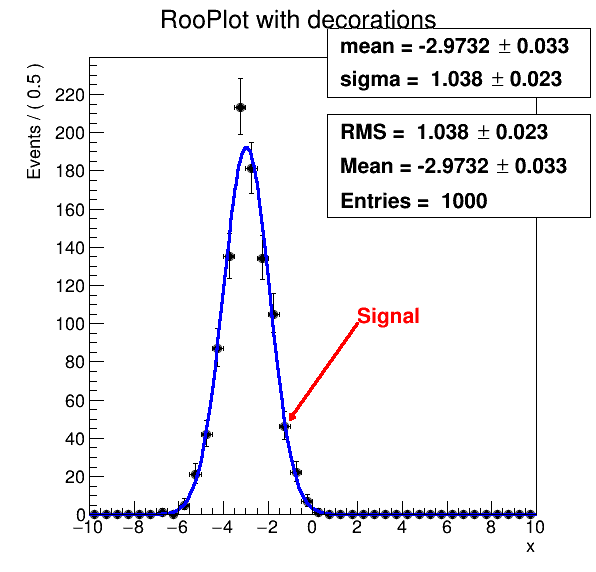

In [13]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()